# HW 6 Logistic Regression

### Gabriel Taylor and Jacob Smith

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
randstate = 1000

In [3]:
df = pd.read_csv('credit_card_clean.csv')

## Question 1

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- The data is relatively imbalanced. Curious if this will affect our outputs later on.
- 77% of the observations are non-default while 22% are default.

In [5]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

- Wonderful, no NA's!

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Question 2

Our target variable here is going to be Default

In [27]:
# checking proportions of data set as it relates to our target variable

pd.crosstab(df['DEFAULT'], df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


Our target variable is relatively imbalanced

## Question 3

In [34]:
df = pd.get_dummies(df, drop_first=True)

In [35]:
# Calculate number of columns
totalColumnCount = df.shape[1]

print(f"We now have a total of {totalColumnCount -1} features")

We now have a total of 27 features


## Question 4

In [9]:
# split the data into target (default) and features (everything but default)
y = df['DEFAULT'] # target
X = df.drop('DEFAULT', axis=1, inplace=False) # feature space

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randstate)

In [10]:
X_train.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,MARRIAGE_other,MARRIAGE_single
25941,25942,210000.0,34,-1,-1,-1,0,0,0,25650.0,...,1943.0,819.0,763.0,2280.0,0,0,0,1,0,0
44,45,40000.0,30,0,0,0,2,0,0,18927.0,...,0.0,2000.0,3000.0,0.0,0,0,0,0,0,1
16295,16296,120000.0,39,0,0,0,0,2,2,116983.0,...,6300.0,3000.0,0.0,3700.0,0,1,0,0,0,0
20232,20233,280000.0,51,-2,-1,-1,-2,-1,-1,390.0,...,4951.0,2408.0,8360.0,6202.0,0,0,0,0,0,0
888,889,90000.0,24,0,0,0,0,0,2,24401.0,...,407.0,673.0,0.0,102.0,0,0,0,1,0,1


In [11]:
y_train.head()

25941    0
44       0
16295    0
20232    1
888      0
Name: DEFAULT, dtype: int64

## Question 5

In [12]:
from sklearn.linear_model import LogisticRegression

#### **Part 1**

In [13]:
logistic = LogisticRegression(penalty='none')
logistic.fit(X_train, y_train)

LogisticRegression(penalty='none')

#### **Part 2**

In [14]:
y_hat = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]

In [15]:
np.round(logistic.predict_proba(X_test), 3)

array([[0.922, 0.078],
       [0.797, 0.203],
       [0.572, 0.428],
       ...,
       [0.834, 0.166],
       [0.61 , 0.39 ],
       [0.811, 0.189]])

#### **Part 3**

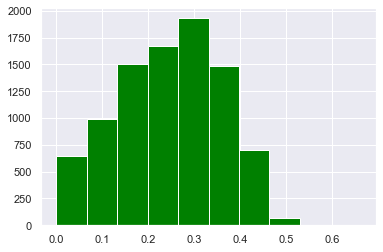

In [16]:
plt.hist(y_hat_probs, color='Green')
plt.show()

- The histogram shows that virtually all observations will be classified as 'NO DEFAULT'. Since the default threshold is 0.5, we see there are hardly any observations that lie beyond that threshold. Thus, we will see lots of false negatives using the default 0.5 threshold. Furthermore, if we were to set the threshold to 0.8, the model would always predict 'NO DEFAULT'. By increasing the threshold, we are also lowering our recall. 

#### Part 4

In [37]:
y_hat_50 = np.where(y_hat_probs>0.5, 1, 0) # setting up a baseline column to see how changing the threshold behaves
y_hat_30 = np.where(y_hat_probs>0.3, 1, 0) # if the probability of default is greater than our threshold of 0.3, classify as 'DEFAULT'
y_hat_60 = np.where(y_hat_probs>0.6, 1, 0) # if the probability of default is greater than our threshold of 0.6, classify as 'DEFAULT'

#### Part 5

In [36]:
df_predictions = pd.DataFrame({'y_hat':y_hat,
                               'y_hat_probs': y_hat_probs,
                               'y_hat_30':y_hat_30,
                               'y_hat_50':y_hat_50,
                               'y_hat_60':y_hat_60})
df_predictions.head(5)

,y_hat,y_hat_probs,y_hat_30,y_hat_50,y_hat_60
0,0,0.078439,0,0,0
1,0,0.203353,0,0,0
2,0,0.428235,1,0,0
3,0,0.237606,0,0,0
4,0,0.288847,0,0,0


- The above dataframe shows how our model will classify certain probabilities/observations depending on the threshold we set. 
- If our goal is to avoid too many false negatives, we should decrease our threshold from 0.5 to 0.3 as we can then capture more defaults. Here we would then see an increase in recall and a decrease in precision. 

## Question 6

#### **Part 1**

In [18]:
# Pedram's code to build a clean confusion matrix and to look at the performance metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None):
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled

In [19]:
my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = -0.01
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


- Look at the number of false negatives! WOW!
1. Accuracy: The value of 0.78 is telling us that our model is performing well HOWEVER we cannot trust this number as our dataset is imbalanced. We must instead resort to using precsion, recall, and f1.
2. Precision: As assumed, according to our precision value, our model is performing very poorly. Our model has not identified any true positives (defaults). 
3. Recall: Similar to the explanation for precision, our recall number also shows that our model is performing exceptionally poorly. Again, since recall relies on true positives (and our value is 0), we get a recall score of 0. 
4. MCC: Our MCC is negative which implies our model is very poor and no better than random prediction.

Note:

2. Precision = $TP/(TP+FP)$
3. Recall = $TP/(TP+FN)$

#### **Part 2**

In [20]:
my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.66
Precision = 0.32
Recall    = 0.51
f1_score  = 0.39
MCC       = 0.18
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4900,2111
Actual : positive,983,1006


- Very interesting outputs when we decrease our threshold to 0.3!
1. Accuracy: Our accuracy has decreased, however this is fine as we choose not to trust this number anyways!
2. Precision: We actually get a value for precision now, this is good. Note that that number comes from $P = 1006/(1006+2111) = 0.32$. 
3. Recall: We also get a value for recall. Note that this comes from $R = 1006/(1006+983) = 0.51$. 
4. MCC: Our MCC is positive when we decrease the threshold denoting that our model has some predictive power AHA!

- Note that as we decreased the threshold, the number of false negatives decreased. This is consistent with our reasoning in Q5, part 4. 

## Question 7

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.652


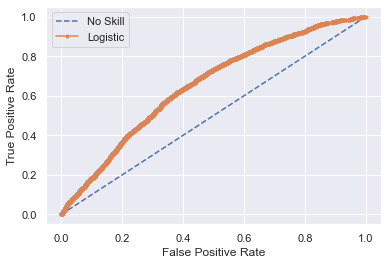

In [21]:
# Pedram's one-stop shop code for ROC score and AUC curve

from sklearn.metrics import roc_curve, roc_auc_score

# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

- As shown above with both the ROC score and the AUC curve, our model is better at predicting than simple, random guesses. 

## Question 8 


In [22]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [23]:
accuracy1 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5, scoring='accuracy')
accuracy2 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10, scoring='accuracy')

#### Accuracy with 5-fold CV

In [24]:
accuracy_CV5 = round(np.mean(accuracy1), 5)
accuracy_CV5

0.77876

#### Accuracy with 10-fold CV

In [25]:
accuracy_CV10 = round(np.mean(accuracy2), 5)
accuracy_CV10

0.77876

These numbers are most likely all very close together as they all used the same threshold upon calculation. We began to see different results for our accuracy in 6.2 once we adjust the threshold number from .5 to .3. Since we did not manipulate our threshold, it make sense our accuracy scores would all be simlar here. 